## Credit card Fraud detection

In [6]:
## Importing necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importing our data set
df = pd.read_csv('archive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# checking the length of our data frame
len(df)

284807

In [5]:
## Checking the summary statictics of numerical columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
## Check the data types of each column
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
## Checking for null values
df.isna().sum()

In [14]:
df.duplicated().sum()

1081

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


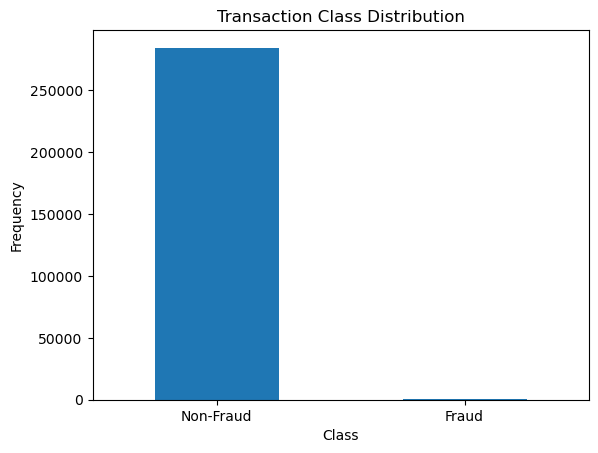

In [52]:
## Determine the number of fraud and valid transactions in the entire data set
count_class = pd.value_counts(df["Class"], sort = True)
count_class.plot(kind = 'bar', rot=0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), labels = ['Non-Fraud', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

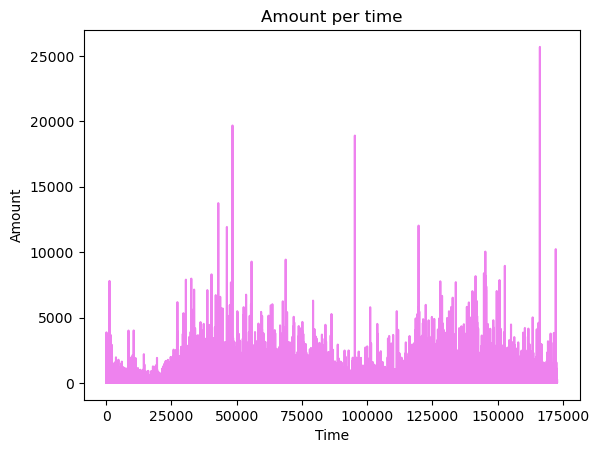

In [25]:
# Creating a plot that shows how the sum of 'Amount' varies over time
df.groupby(['Time'])['Amount'].sum().plot(xlabel = 'Time', ylabel = 'Amount', color = 'violet', title = 'Amount per time')
plt.show()

In [31]:
# Calculating the mean and standard deviation of 'Amount'
mean_amount = df["Amount"].mean()
std_amount = df["Amount"].std()

# Perform Z-score normalization on 'Amount'
df['Amount_normalized'] = (df["Amount"] - mean_amount) / std_amount
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_normalized
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342474
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160684
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350150
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254116
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313248


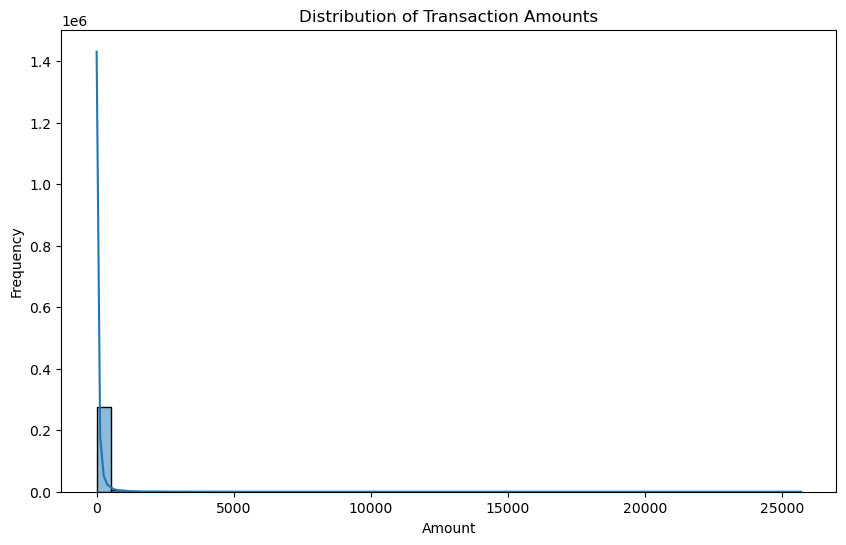

In [33]:
# Histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

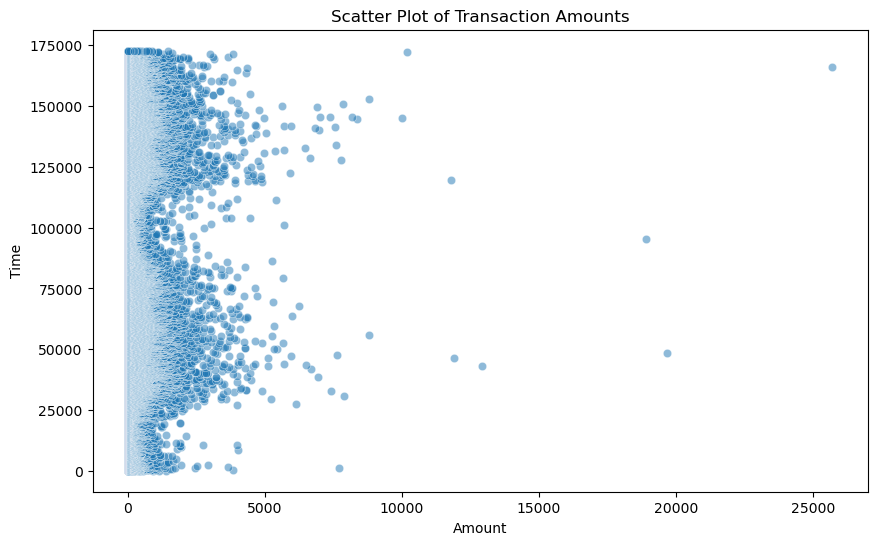

In [36]:
# Creating a scatter plot for Transaction Amounts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='Time', data=df, alpha=0.5)
plt.title('Scatter Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.show()

In [38]:
## Implementing anamoly detection algorithms to identify fraudlent transactions
from sklearn.ensemble import IsolationForest

## Converting our time in minutes
df["Time_minutes"] = df["Time"] / 60
df["Time_minutes"].head()

0    0.000000
1    0.000000
2    0.016667
3    0.016667
4    0.033333
Name: Time_minutes, dtype: float64

In [42]:
## Training the anomaly detection model
x_train = df.drop(["Class"],axis = 1)
y_train = df["Class"]

## Creating an Isolation Forest model 
model = IsolationForest(contamination = 0.02, random_state=42)

## Fitting the model to the dataset
model.fit(x_train);

In [44]:
## Predicting the anomalies
predictions = model.predict(x_train)

## Adding the prediction as a new column in the dataframe
df["Prediction"] = predictions
df["Prediction"].head()

0    1
1    1
2    1
3    1
4    1
Name: Prediction, dtype: int32

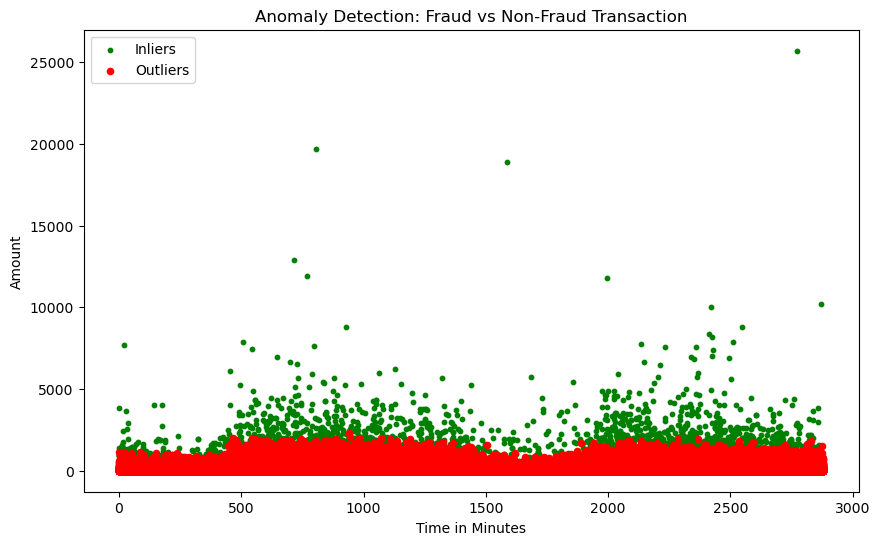

In [45]:
## Visualizing Anomalies
plt.figure(figsize = (10, 6))

## Plotting inliers (non-fraud transactions)
plt.scatter(df[df["Prediction"] == -1]["Time_minutes"], df[df["Prediction"] == -1]["Amount"], color = 'green', s= 10, label = 'Inliers')

## Plotting outliers (fraud transactions)
plt.scatter(df[df["Prediction"] == 1]["Time_minutes"], df[df["Prediction"] == 1]["Amount"], color = 'red', s= 20, label = 'Outliers')

plt.title("Anomaly Detection: Fraud vs Non-Fraud Transaction")
plt.xlabel("Time in Minutes")
plt.ylabel("Amount")
plt.legend()
plt.show()

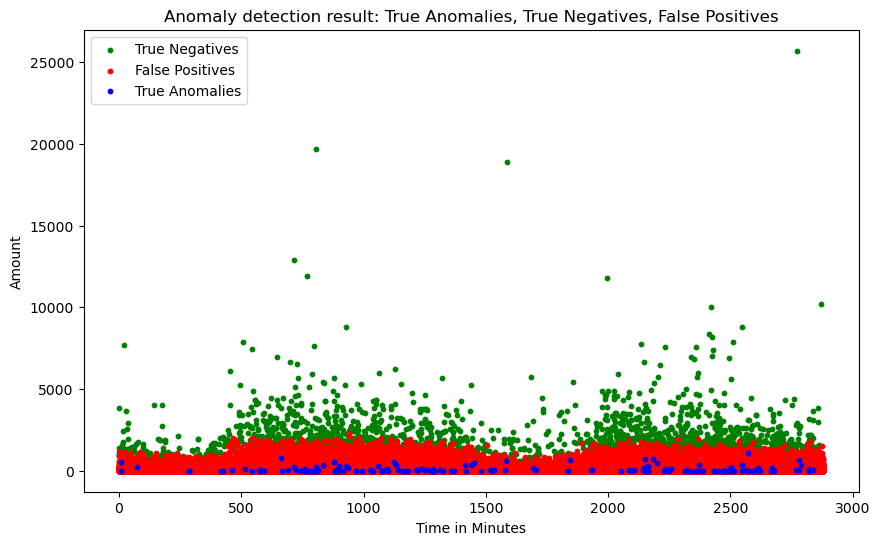

In [58]:
## Visualizing the results using the false positives

# Setting the figure size
plt.figure(figsize= (10, 6))

# Plot true negatives (non-fraudulent transactions classified as non-anomalies)
plt.scatter(df[(df["Prediction"] == -1) & (df["Class"] == 0)]["Time_minutes"],
            df[(df["Prediction"] == -1) & (df['Class'] == 0)]['Amount'],
            color='green', s=10, label='True Negatives')

## Plot false positives (non-fraudlent transactions classified as anomalies)
plt.scatter(df[(df["Prediction"] == 1) & (df["Class"] == 0)]["Time_minutes"],
            df[(df["Prediction"] == 1) & (df["Class"] == 0)]["Amount"],
           color = 'red', s=10, label = 'False Positives')

# Plot true anomalies (fraudulent transactions)
plt.scatter(df[(df['Prediction'] == 1) & (df['Class'] == 1)]['Time_minutes'],
            df[(df['Prediction'] == 1) & (df['Class'] == 1)]['Amount'],
            color='blue', s=10, label='True Anomalies')
plt.title('Anomaly detection result: True Anomalies, True Negatives, False Positives')
plt.xlabel('Time in Minutes')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [ ]:
## In the above visualization we saw the different types of outcomes our system found
# "True Anomalies" are the real frauds which have been detected correctly 
# "True Negatives" are the normal transactions which have been identified correctly
#"False Positives" are normal transactions which are mistakenly thought to be fraud